***Proyecto Sprint 9: Análisis de Negocio para la Empresa Showz***
---

**Descripción del proyecto**
Showz es una empresa de venta de entradas a eventos. El departamento de marketing busca optimizar sus gastos publicitarios y comprender mejor el comportamiento de los usuarios en la plataforma. Como analistas de datos, nuestro objetivo es evaluar la efectividad de las campañas de marketing y la rentabilidad de los clientes adquiridos a través de distintas fuentes de tráfico.

**Objetivos principales**
1. Analizar el comportamiento de los usuarios en la aplicación web de Showz.
2. Calcular métricas clave del negocio: 
   - Retención y conversión de usuarios.
   - Ticket promedio y LTV.
   - CAC y ROMI por fuente de adquisición.
3. Identificar los canales de marketing más rentables.
4. Brindar recomendaciones estratégicas para la asignación del presupuesto publicitario.

**Trabajaremos con tres archivos principales:**

- **visits_log_us.csv:** información sobre visitas y sesiones de usuarios.
- **orders_log_us.csv:** datos de pedidos y compras.
- **costs_us.csv:** gastos de marketing por fuente de adquisición.

El análisis combinará métricas de comportamiento de usuarios, ingresos y costos de marketing con el fin de responder a la pregunta central:  
**¿Qué canales de adquisición generan mayor rentabilidad para Showz y cómo debe invertirse el presupuesto de marketing?**

---

***1. Carga y preparación de los datos***
---

Cargaremos los archivos que contienen la información de visitas, pedidos y gastos de marketing.

Archivos a utilizar:
- `visits_log_us.csv` → registros de visitas de los usuarios.
- `orders_log_us.csv` → información de pedidos realizados.
- `costs_us.csv` → gastos de marketing por fuente de adquisición.


In [23]:
# Importamos librerías necesarias
import pandas as pd

# Definimos las rutas de los archivos
path_visits = r"C:\Users\DIEGO TASCON\Desktop\TRIPLETEN\Sprint 9\visits_log_us.csv"
path_orders = r"C:\Users\DIEGO TASCON\Desktop\TRIPLETEN\Sprint 9\orders_log_us.csv"
path_costs = r"C:\Users\DIEGO TASCON\Desktop\TRIPLETEN\Sprint 9\costs_us.csv"

# Cargamos los datasets
visits = pd.read_csv(path_visits, sep=',')
orders = pd.read_csv(path_orders, sep=',')
costs = pd.read_csv(path_costs, sep=',')

# Visualizamos las primeras filas de cada dataset
print("VISITS")
display(visits.head())

print("\nORDERS")
display(orders.head())

print("\nCOSTS")
display(costs.head())


VISITS


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168



ORDERS


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450



COSTS


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


***Exploración inicial de los datos***
---

Verificaremos la estructura de los datasets cargados. Esto nos permitirá evaluar la calidad de los datos y planear las transformaciones necesarias antes del análisis: 

- Cantidad de filas y columnas de cada dataset.  
- Tipos de datos y valores nulos.  
- Comprobar si existen duplicados.




In [24]:
# Revisamos el tamaño de cada dataset
print("Tamaño de VISITS:", visits.shape)
print("Tamaño de ORDERS:", orders.shape)
print("Tamaño de COSTS:", costs.shape)

Tamaño de VISITS: (359400, 5)
Tamaño de ORDERS: (50415, 3)
Tamaño de COSTS: (2542, 3)


In [25]:
# Información general de cada dataset
print("\n--- INFO VISITS ---")
print(visits.info())


--- INFO VISITS ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


In [26]:
print("\n--- INFO ORDERS ---")
print(orders.info())


--- INFO ORDERS ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


In [27]:
print("\n--- INFO COSTS ---")
print(costs.info())


--- INFO COSTS ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


In [28]:
# Revisión de valores nulos
print("\nValores nulos en VISITS:\n", visits.isnull().sum())
print("\nValores nulos en ORDERS:\n", orders.isnull().sum())
print("\nValores nulos en COSTS:\n", costs.isnull().sum())

# Revisión de duplicados
print("\nDuplicados en VISITS:", visits.duplicated().sum())
print("Duplicados en ORDERS:", orders.duplicated().sum())
print("Duplicados en COSTS:", costs.duplicated().sum())


Valores nulos en VISITS:
 Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

Valores nulos en ORDERS:
 Buy Ts     0
Revenue    0
Uid        0
dtype: int64

Valores nulos en COSTS:
 source_id    0
dt           0
costs        0
dtype: int64

Duplicados en VISITS: 0
Duplicados en ORDERS: 0
Duplicados en COSTS: 0


***Preparación de los datos***
---

Como no encontramos valores nulos ni duplicados, el siguiente paso es transformar las columnas de tipo fecha a formato `datetime`.  
Esto es fundamental para poder agrupar, filtrar y analizar los datos en el tiempo.  

- En `visits`: convertir `Start Ts` y `End Ts`.  
- En `orders`: convertir `Buy Ts`.  
- En `costs`: convertir `dt`.  

Revisaremos si los nombres de columnas tienen inconsistencias (ej. `Source Id` vs `source_id`) para estandarizarlos.


In [29]:
# Conversión de columnas de fechas a datetime

# VISITS
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])

# ORDERS
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

# COSTS
costs['dt'] = pd.to_datetime(costs['dt'])

# Estandarizamos nombres de columnas para consistencia
visits.rename(columns={'Source Id': 'source_id'}, inplace=True)

# Verificación de cambios
print("\nTipos de datos después de la conversión:")
print("VISITS:\n", visits.dtypes)
print("\nORDERS:\n", orders.dtypes)
print("\nCOSTS:\n", costs.dtypes)



Tipos de datos después de la conversión:
VISITS:
 Device               object
End Ts       datetime64[ns]
source_id             int64
Start Ts     datetime64[ns]
Uid                  uint64
dtype: object

ORDERS:
 Buy Ts     datetime64[ns]
Revenue           float64
Uid                uint64
dtype: object

COSTS:
 source_id             int64
dt           datetime64[ns]
costs               float64
dtype: object


In [30]:
# Normalización de nombres de columnas
visits.columns = visits.columns.str.strip().str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.strip().str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.strip().str.lower().str.replace(' ', '_')

# Creación de columnas temporales
# VISITS
visits['year'] = visits['start_ts'].dt.year
visits['month'] = visits['start_ts'].dt.month
visits['week'] = visits['start_ts'].dt.isocalendar().week
visits['day'] = visits['start_ts'].dt.day

# ORDERS
orders['year'] = orders['buy_ts'].dt.year
orders['month'] = orders['buy_ts'].dt.month
orders['week'] = orders['buy_ts'].dt.isocalendar().week
orders['day'] = orders['buy_ts'].dt.day

# COSTS
costs['year'] = costs['dt'].dt.year
costs['month'] = costs['dt'].dt.month
costs['week'] = costs['dt'].dt.isocalendar().week
costs['day'] = costs['dt'].dt.day

# Confirmamos cambios
print("Columnas VISITS:", visits.columns.tolist())
print("Columnas ORDERS:", orders.columns.tolist())
print("Columnas COSTS:", costs.columns.tolist())

Columnas VISITS: ['device', 'end_ts', 'source_id', 'start_ts', 'uid', 'year', 'month', 'week', 'day']
Columnas ORDERS: ['buy_ts', 'revenue', 'uid', 'year', 'month', 'week', 'day']
Columnas COSTS: ['source_id', 'dt', 'costs', 'year', 'month', 'week', 'day']


**Creación de columna de periodo combinado**

Dado que el objetivo principal es analizar la eficiencia de las inversiones de marketing a lo largo del tiempo, resulta clave crear una columna de periodo en formato "YYYY-MM". Esto permitirá unificar y comparar las métricas mensuales entre visitas, pedidos y costos, facilitando el cálculo de KPIs como CAC, LTV y ROMI.


In [31]:
# Creación de columna de periodo (YYYY-MM)
visits['period'] = visits['start_ts'].dt.to_period('M')
orders['period'] = orders['buy_ts'].dt.to_period('M')
costs['period'] = costs['dt'].dt.to_period('M')

# Confirmamos
display(visits[['start_ts','period']].head())
print()
display(orders[['buy_ts','period']].head())
print()
display(costs[['dt','period']].head())

,start_ts,period
0,2017-12-20 17:20:00,2017-12
1,2018-02-19 16:53:00,2018-02
2,2017-07-01 01:54:00,2017-07
3,2018-05-20 10:59:00,2018-05
4,2017-12-27 14:06:00,2017-12


,buy_ts,period
0,2017-06-01 00:10:00,2017-06
1,2017-06-01 00:25:00,2017-06
2,2017-06-01 00:27:00,2017-06
3,2017-06-01 00:29:00,2017-06
4,2017-06-01 07:58:00,2017-06


,dt,period
0,2017-06-01,2017-06
1,2017-06-02,2017-06
2,2017-06-03,2017-06
3,2017-06-04,2017-06
4,2017-06-05,2017-06


***Exploración descriptiva inicial***
---

Para entender el comportamiento de la plataforma y los costos de marketing, realizamos un análisis descriptivo básico agrupando por el periodo mensual. Mostraremos el número de visitas y pedidos, junto con los costos de marketing totales, lo que permitirá identificar la escala de la actividad y los gastos mes a mes.


In [32]:
# Agrupamos visitas, pedidos y costos por periodo mensual
visits_by_month = visits.groupby('period')['uid'].nunique().reset_index(name='unique_visitors')
orders_by_month = orders.groupby('period')['uid'].nunique().reset_index(name='unique_buyers')
costs_by_month = costs.groupby('period')['costs'].sum().reset_index(name='total_costs')

# Visualizamos resultados
print("Visitas únicas por mes:")
display(visits_by_month)

Visitas únicas por mes:


,period,unique_visitors
0,2017-06,13259
1,2017-07,14183
2,2017-08,11631
3,2017-09,18975
4,2017-10,29692
5,2017-11,32797
6,2017-12,31557
7,2018-01,28716
8,2018-02,28749
9,2018-03,27473


In [33]:
print("\nCompradores únicos por mes:")
display(orders_by_month)


Compradores únicos por mes:


,period,unique_buyers
0,2017-06,2023
1,2017-07,1984
2,2017-08,1472
3,2017-09,2750
4,2017-10,4675
5,2017-11,4547
6,2017-12,4942
7,2018-01,3898
8,2018-02,4258
9,2018-03,4181


In [34]:
print("\nCostos de marketing por mes:")
display(costs_by_month)


Costos de marketing por mes:


,period,total_costs
0,2017-06,18015.00
1,2017-07,18240.59
2,2017-08,14790.54
3,2017-09,24368.91
4,2017-10,36322.88
5,2017-11,37907.88
6,2017-12,38315.35
7,2018-01,33518.52
8,2018-02,32723.03
9,2018-03,30415.27


***Paso 2. Haz informes y calcula métricas***
---

**Visitas – Usuarios Activos (DAU, WAU, MAU)**

Para analizar la actividad de los usuarios, se calcularán las métricas clave de engagement:
- **DAU (Daily Active Users):** número de usuarios únicos por día.
- **WAU (Weekly Active Users):** número de usuarios únicos por semana.
- **MAU (Monthly Active Users):** número de usuarios únicos por mes.

Estas métricas permiten evaluar la frecuencia de uso de la plataforma y son fundamentales para comprender la base activa de clientes potenciales.



In [35]:
# DAU - Usuarios activos diarios
dau = visits.groupby(['year', 'month', 'day'])['uid'].nunique().reset_index()
dau.rename(columns={'uid': 'dau'}, inplace=True)

# WAU - Usuarios activos semanales
wau = visits.groupby(['year', 'week'])['uid'].nunique().reset_index()
wau.rename(columns={'uid': 'wau'}, inplace=True)

# MAU - Usuarios activos mensuales
mau = visits.groupby(['year', 'month'])['uid'].nunique().reset_index()
mau.rename(columns={'uid': 'mau'}, inplace=True)

display(dau.head())
print()
display(wau.head())
print()
display(mau.head())

,year,month,day,dau
0,2017,6,1,605
1,2017,6,2,608
2,2017,6,3,445
3,2017,6,4,476
4,2017,6,5,820


,year,week,wau
0,2017,22,2021
1,2017,23,4129
2,2017,24,2812
3,2017,25,2878
4,2017,26,3064


,year,month,mau
0,2017,6,13259
1,2017,7,14183
2,2017,8,11631
3,2017,9,18975
4,2017,10,29692


***Visitas – Visualización de Usuarios Activos (DAU, WAU, MAU)***

Tras calcular DAU, WAU y MAU, se procede a su visualización mediante gráficos de líneas.
Esto permitirá identificar:
- Fluctuaciones en el uso diario de la plataforma.
- Patrones semanales de engagement.
- Evolución mensual de la base de usuarios activos.

El objetivo es observar si existe un crecimiento sostenido, caídas significativas o estacionalidad en la actividad de los usuarios.


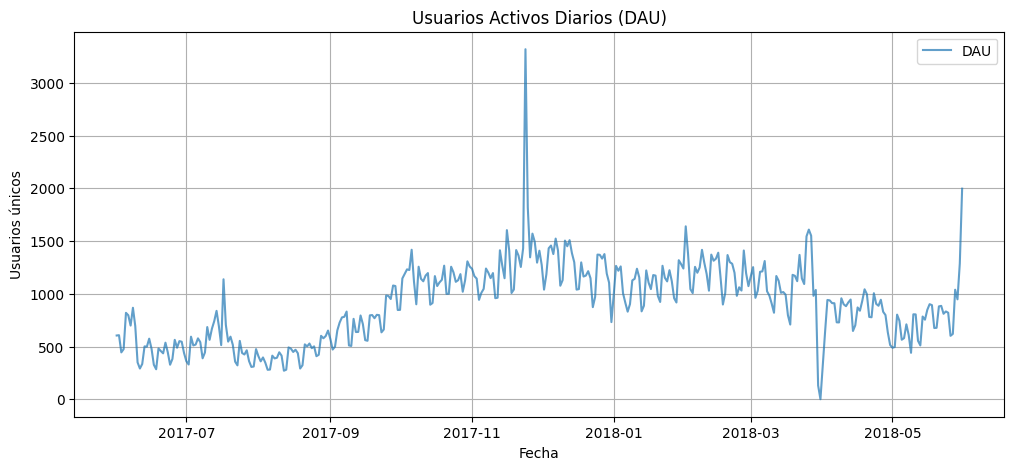

In [36]:
import matplotlib.pyplot as plt

# --- Visualización de DAU ---
plt.figure(figsize=(12,5))
plt.plot(pd.to_datetime(dau[['year','month','day']]), dau['dau'], label='DAU', alpha=0.7)
plt.title('Usuarios Activos Diarios (DAU)')
plt.xlabel('Fecha')
plt.ylabel('Usuarios únicos')
plt.legend()
plt.grid(True)
plt.show()


**El DAU** muestra variaciones fuertes de un día a otro, con picos en ciertos días que reflejan mayor actividad, posiblemente por eventos o promociones.

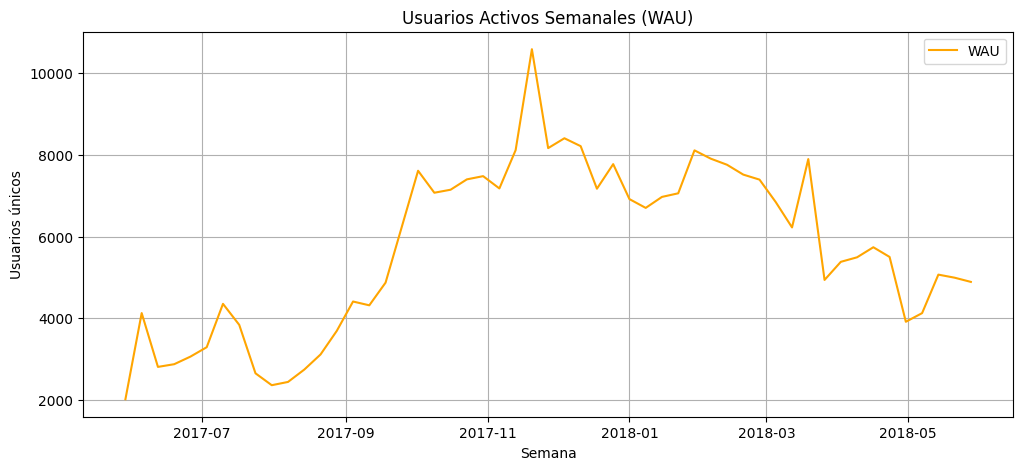

In [37]:
# --- Visualización de WAU ---
plt.figure(figsize=(12,5))
# Creamos una columna de referencia temporal para las semanas (año + semana)
wau['week_ref'] = wau['year'].astype(str) + '-W' + wau['week'].astype(str)
plt.plot(pd.to_datetime(wau['week_ref'] + '-1', format='%G-W%V-%u'), wau['wau'], label='WAU', color='orange')
plt.title('Usuarios Activos Semanales (WAU)')
plt.xlabel('Semana')
plt.ylabel('Usuarios únicos')
plt.legend()
plt.grid(True)
plt.show()

**El WAU** suaviza esa variabilidad y permite ver que, aunque hay semanas con caídas, en general se mantiene una tendencia estable con momentos de crecimiento ligados a campañas de marketing.

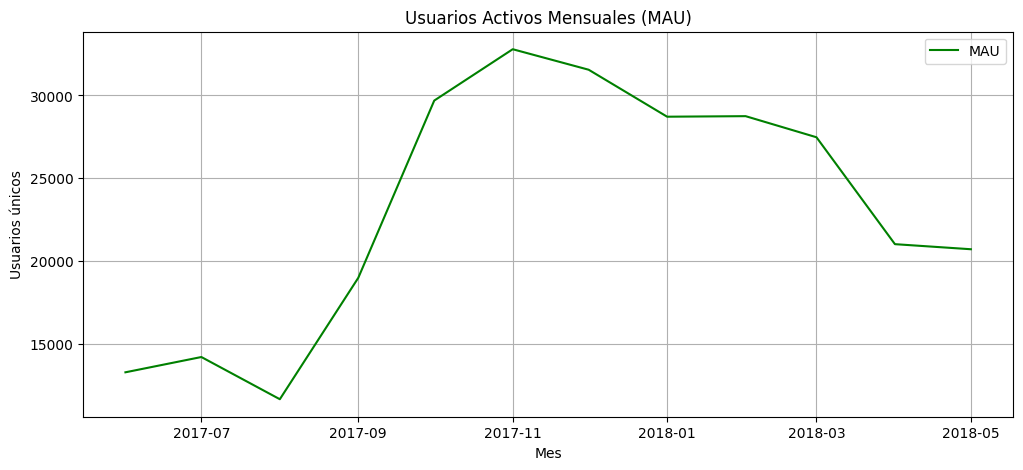

In [38]:
# --- Visualización de MAU ---
plt.figure(figsize=(12,5))
# Creamos columna de referencia temporal para meses (año + mes)
mau['month_ref'] = mau['year'].astype(str) + '-' + mau['month'].astype(str)
plt.plot(pd.to_datetime(mau['month_ref'], format='%Y-%m'), mau['mau'], label='MAU', color='green')
plt.title('Usuarios Activos Mensuales (MAU)')
plt.xlabel('Mes')
plt.ylabel('Usuarios únicos')
plt.legend()
plt.grid(True)
plt.show()

**El MAU** indica que la base de usuarios activos mensuales ha crecido con el tiempo, mostrando que la plataforma logra retener y atraer usuarios de manera sostenida.

***Visitas:***
---

*1. ¿Cuántas personas lo usan cada día, semana y mes?*

In [39]:
# DAU - Usuarios activos diarios
dau = visits.groupby(['year','month','day'])['uid'].nunique().mean()

# WAU - Usuarios activos semanales
wau = visits.groupby(['year','week'])['uid'].nunique().mean()

# MAU - Usuarios activos mensuales
mau = visits.groupby(['year','month'])['uid'].nunique().mean()

print(f"Usuarios activos promedio por día (DAU): {dau:.0f}")
print(f"Usuarios activos promedio por semana (WAU): {wau:.0f}")
print(f"Usuarios activos promedio por mes (MAU): {mau:.0f}")


Usuarios activos promedio por día (DAU): 908
Usuarios activos promedio por semana (WAU): 5716
Usuarios activos promedio por mes (MAU): 23228


*2. ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).*

In [40]:
# 1. Asegurar que las columnas de tiempo están en formato datetime
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])

# 2. Crear columna con la duración de cada sesión en minutos
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds() / 60

# 3. Calcular cuartiles e IQR
Q1 = visits['session_duration'].quantile(0.25)
Q3 = visits['session_duration'].quantile(0.75)
IQR = Q3 - Q1

# 4. Definir límites para detectar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 5. Filtrar las sesiones válidas eliminando outliers y valores negativos
visits_filtered = visits[
    (visits['session_duration'] >= 0) &
    (visits['session_duration'] >= lower_bound) &
    (visits['session_duration'] <= upper_bound)
]

# 6. Verificar el nuevo describe()
visits_filtered['session_duration'].describe()


count    334742.000000
mean          7.421007
std           7.947895
min           0.000000
25%           1.000000
50%           4.000000
75%          11.000000
max          32.000000
Name: session_duration, dtype: float64

In [41]:
# Crear una copia para evitar el warning
visits_filtered = visits_filtered.copy()

# Asegurar formato datetime
visits_filtered.loc[:, 'start_ts'] = pd.to_datetime(visits_filtered['start_ts'])

# Extraer solo la fecha
visits_filtered.loc[:, 'date'] = visits_filtered['start_ts'].dt.date

# Contar sesiones por día
sessions_per_day = (
    visits_filtered.groupby('date')['uid']
    .count()
    .reset_index()
    .rename(columns={'uid': 'sessions'})
)

# Mostrar las primeras filas
display(sessions_per_day.head())


,date,sessions
0,2017-06-01,608
1,2017-06-02,628
2,2017-06-03,447
3,2017-06-04,482
4,2017-06-05,834


*3. ¿Cuál es la duración de cada sesión?*

In [42]:
# Aseguramos que las columnas de tiempo estén en formato datetime
visits_filtered['start_ts'] = pd.to_datetime(visits_filtered['start_ts'])
visits_filtered['end_ts'] = pd.to_datetime(visits_filtered['end_ts'])

# Calculamos la duración de la sesión en minutos
visits_filtered['session_duration'] = (visits_filtered['end_ts'] - visits_filtered['start_ts']).dt.total_seconds() / 60

# Mostramos una muestra
visits_filtered[['uid', 'start_ts', 'end_ts', 'session_duration']].head(10)

,uid,start_ts,end_ts,session_duration
0,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,18.0
1,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,28.0
2,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,0.0
3,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,24.0
4,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00,0.0
5,16007536194108375387,2017-09-03 21:35:00,2017-09-03 21:36:00,1.0
7,11423865690854540312,2017-11-05 15:14:00,2017-11-05 15:15:00,1.0
8,2987360259350925644,2017-07-19 10:41:00,2017-07-19 10:44:00,3.0
9,1289240080042562063,2017-11-08 13:42:00,2017-11-08 13:43:00,1.0
10,14879997728223227242,2017-07-14 12:43:00,2017-07-14 12:44:00,1.0


la duración de cada sesión en minutos está en la columna session_duration

*4. ¿Con qué frecuencia los usuarios regresan?*

In [43]:
# Aseguramos que las fechas estén en formato datetime
visits_filtered['start_ts'] = pd.to_datetime(visits_filtered['start_ts'])

# Ordenamos por usuario y fecha
visits_filtered = visits_filtered.sort_values(by=['uid', 'start_ts'])

# Calculamos la diferencia en días entre sesiones consecutivas de cada usuario
visits_filtered['days_since_last_session'] = visits_filtered.groupby('uid')['start_ts'].diff().dt.days

# Eliminamos el sesgo: quitamos los usuarios que solo tienen una sesión (su diff será NaN siempre)
user_session_counts = visits_filtered['uid'].value_counts()
valid_users = user_session_counts[user_session_counts > 1].index
returns = visits_filtered[visits_filtered['uid'].isin(valid_users)]

# Resumen estadístico de la frecuencia de retorno
freq_return_summary = returns['days_since_last_session'].dropna().describe()

print(freq_return_summary)


count    113637.000000
mean         30.106233
std          51.359537
min           0.000000
25%           0.000000
50%           6.000000
75%          36.000000
max         362.000000
Name: days_since_last_session, dtype: float64


Aunque el promedio es de 30 días, la mediana muestra que lo más común es que los usuarios regresen dentro de la primera semana. Esto significa que:

* Existe un núcleo fuerte de usuarios que interactúan de manera muy frecuente (diaria o semanal).

* Al mismo tiempo, hay usuarios que regresan de manera esporádica, lo que eleva la media.

***2. Ventas:***
---

*1. ¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)*

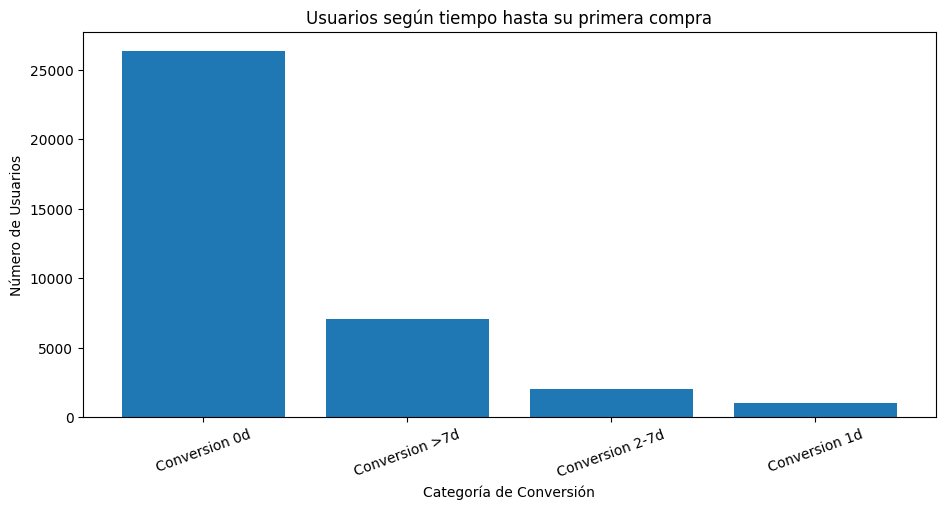

In [44]:
# Aseguramos que las columnas de fechas estén en formato datetime
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

# 1. Primera visita de cada usuario
first_visits = visits.groupby('uid')['start_ts'].min().reset_index()
first_visits.rename(columns={'start_ts': 'first_visit'}, inplace=True)

# 2. Primera compra de cada usuario
first_orders = orders.groupby('uid')['buy_ts'].min().reset_index()
first_orders.rename(columns={'buy_ts': 'first_order'}, inplace=True)

# 3. Unimos ambas tablas
conversion = pd.merge(first_visits, first_orders, on='uid', how='inner')

# 4. Calculamos la diferencia en días
conversion['conversion_days'] = (conversion['first_order'] - conversion['first_visit']).dt.days

# 5. Clasificación en cohortes de conversión
def categorize_conversion(days):
    if days == 0:
        return 'Conversion 0d'
    elif days == 1:
        return 'Conversion 1d'
    elif 2 <= days <= 7:
        return 'Conversion 2-7d'
    else:
        return 'Conversion >7d'

conversion['conversion_category'] = conversion['conversion_days'].apply(categorize_conversion)

# 6. Conteo de usuarios por categoría
conversion_summary = conversion['conversion_category'].value_counts().reset_index()
conversion_summary.columns = ['conversion_category', 'num_users']

# Gráfico de barras
plt.figure(figsize=(11,5))
plt.bar(conversion_summary['conversion_category'], conversion_summary['num_users'])

plt.title('Usuarios según tiempo hasta su primera compra')
plt.xlabel('Categoría de Conversión')
plt.ylabel('Número de Usuarios')
plt.xticks(rotation=20)

plt.show()

Lo usuarios comienzan a comprar principalmente el mismo día del registro. La cohorte de **"Conversión 0d"** es, por lejos, la más numerosa, con más de 25,000 usuarios. Esto indica que **el período de tiempo más común para la primera compra es dentro de las primeras 24 horas.** Las conversiones posteriores disminuyen drásticamente, con la categoría de ">7 días" en segundo lugar y las de 1 y 2-7 días con la menor cantidad de usuarios.

*2. ¿Cuántos pedidos hacen durante un período de tiempo dado?*

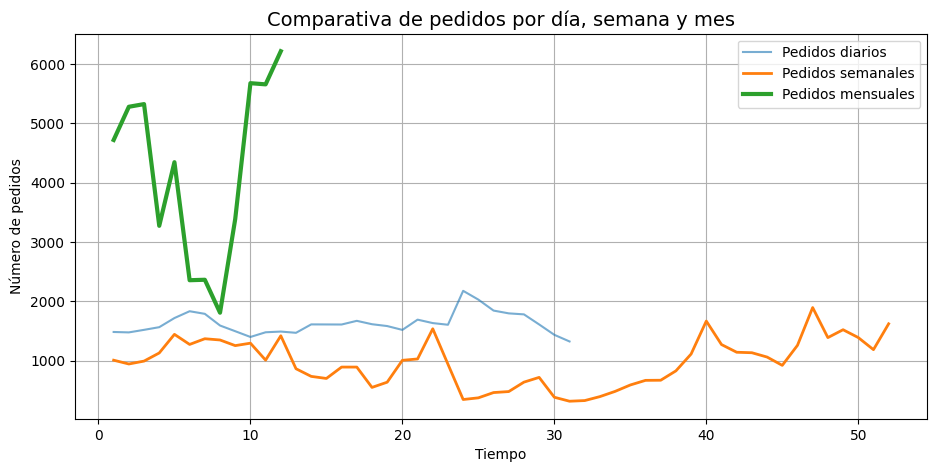

In [45]:
# Aseguramos que la columna de fechas esté en formato datetime
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

# Número de pedidos por día
orders_per_day = orders.groupby('day')['uid'].count()

# Número de pedidos por semana
orders_per_week = orders.groupby('week')['uid'].count()

# Número de pedidos por mes
orders_per_month = orders.groupby('month')['uid'].count()

# Gráfica unificada
plt.figure(figsize=(11,5))

plt.plot(orders_per_day.index, orders_per_day.values, label="Pedidos diarios", alpha=0.6)
plt.plot(orders_per_week.index, orders_per_week.values, label="Pedidos semanales", linewidth=2)
plt.plot(orders_per_month.index, orders_per_month.values, label="Pedidos mensuales", linewidth=3)

plt.title("Comparativa de pedidos por día, semana y mes", fontsize=14)
plt.xlabel("Tiempo")
plt.ylabel("Número de pedidos")
plt.legend()
plt.grid(True)
plt.show()

**Pedidos diarios:** La línea azul muestra el número de pedidos por día. A lo largo del mes que se representa (aproximadamente 30 días), la cantidad de pedidos diarios se mantiene relativamente estable, fluctuando principalmente **entre 1,200 y 1,800 pedidos.**

**Pedidos semanales:** La línea naranja muestra el número de pedidos semanales. Esta métrica muestra un patrón más largo y cíclico, que abarca más de 50 semanas. **El número de pedidos por semana generalmente se encuentra entre 500 y 2,000**, con algunos períodos de fuerte caída (alrededor de la semana 25) y picos de crecimiento (alrededor de la semana 45).

**Pedidos mensuales:** La línea verde muestra el número de pedidos mensuales. Esta serie de datos abarca un período más corto pero muestra las mayores fluctuaciones. **El número de pedidos por mes varía drásticamente desde un mínimo de alrededor de 1,800 pedidos hasta un máximo de más de 6,000 pedidos.**

*3. ¿Cuál es el tamaño promedio de compra?*

Tamaño promedio de compra (general): 5.00


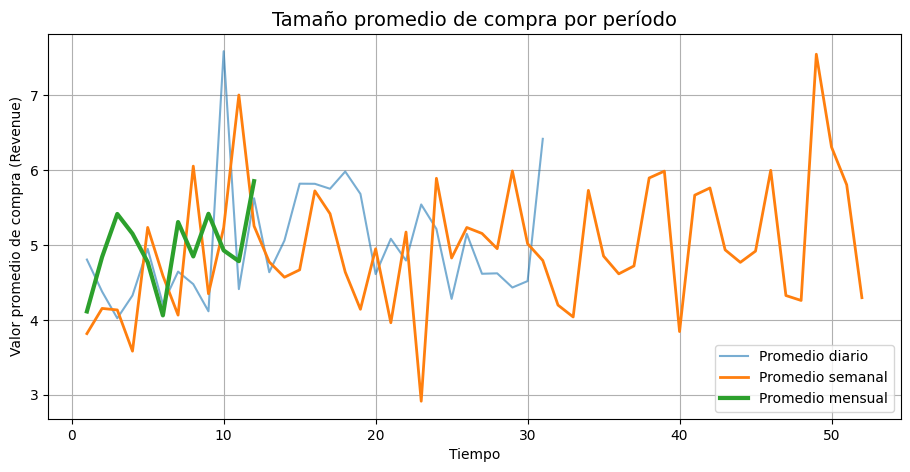

In [46]:
# Promedio general de tamaño de compra
avg_order_value = orders['revenue'].mean()
print(f"Tamaño promedio de compra (general): {avg_order_value:.2f}")

# Promedio por día, semana y mes
avg_order_value_day = orders.groupby('day')['revenue'].mean()
avg_order_value_week = orders.groupby('week')['revenue'].mean()
avg_order_value_month = orders.groupby('month')['revenue'].mean()

# Gráfica comparativa
plt.figure(figsize=(11,5))

plt.plot(avg_order_value_day.index, avg_order_value_day.values, label="Promedio diario", alpha=0.6)
plt.plot(avg_order_value_week.index, avg_order_value_week.values, label="Promedio semanal", linewidth=2)
plt.plot(avg_order_value_month.index, avg_order_value_month.values, label="Promedio mensual", linewidth=3)

plt.title("Tamaño promedio de compra por período", fontsize=14)
plt.xlabel("Tiempo")
plt.ylabel("Valor promedio de compra (Revenue)")
plt.legend()
plt.grid(True)
plt.show()


El volumen de pedidos y el tamaño promedio de compra varían significativamente por día, semana y mes, mostrando picos y valles a lo largo del tiempo. Aunque **el promedio diario de compra se mantiene entre $4 y $6, se observan picos que superan los $7**, lo que indica que, al igual que con la duración de las sesiones, hay compras individuales que se desvían de la media.

*4. ¿Cuánto dinero traen? (LTV)*

LTV general (promedio de ingresos por cliente): 6.90


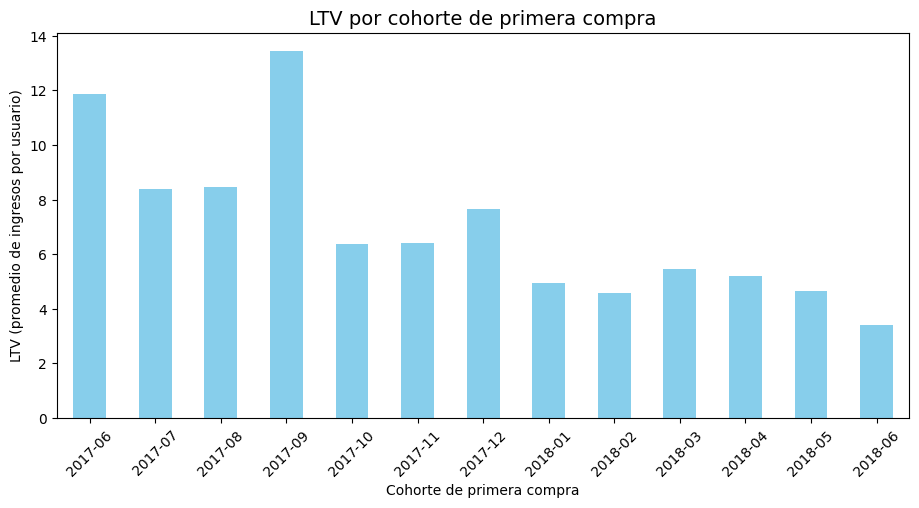

In [47]:
# Calcular ingresos totales por usuario
user_revenue = orders.groupby('uid')['revenue'].sum()

# Calcular LTV (promedio de ingresos por usuario)
ltv = user_revenue.mean()
print(f"LTV general (promedio de ingresos por cliente): {ltv:.2f}")

# --- Análisis adicional: LTV por cohorte de mes de primera compra ---
orders['first_buy_month'] = pd.to_datetime(orders['buy_ts']).dt.to_period('M')
user_first_buy = orders.groupby('uid')['first_buy_month'].min().reset_index()
user_revenue = user_revenue.reset_index().merge(user_first_buy, on='uid', how='left')

ltv_by_cohort = user_revenue.groupby('first_buy_month')['revenue'].mean()

# Gráfica LTV por cohorte
plt.figure(figsize=(11,5))
ltv_by_cohort.plot(kind='bar', color='skyblue')
plt.title("LTV por cohorte de primera compra", fontsize=14)
plt.ylabel("LTV (promedio de ingresos por usuario)")
plt.xlabel("Cohorte de primera compra")
plt.xticks(rotation=45)
plt.show()

**Las cohortes de 2017 fueron las más valiosas, con LTV promedio por usuario que alcanzó un pico de $13.50** en septiembre de ese año. Sin embargo, a partir de ese mes, **el valor promedio del cliente ha mostrado una clara tendencia a la baja. Las cohortes de 2018 tienen consistentemente un LTV inferior, llegando a solo $3.50** en junio de 2018. Esto indica que los clientes más recientes están generando significativamente menos ingresos que las cohortes más antiguas.

***3. Marketing:***
---

*1. ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo)*

In [48]:
# 1. Gasto total en marketing
total_cost = costs['costs'].sum()
print(f"Gasto total en marketing: {total_cost:.2f}")

# 2. Gasto por fuente de adquisición
costs_by_source = costs.groupby('source_id')['costs'].sum().sort_values(ascending=False)
print("\nGasto por fuente de adquisición:")
display(costs_by_source)

# 3. Evolución del gasto en el tiempo (mensual)
monthly_costs = costs.groupby(['year','month'])['costs'].sum().reset_index()
monthly_costs['period'] = pd.to_datetime(monthly_costs['year'].astype(str) + '-' + monthly_costs['month'].astype(str))

Gasto total en marketing: 329131.62

Gasto por fuente de adquisición:


source_id
3     141321.63
4      61073.60
5      51757.10
2      42806.04
1      20833.27
10      5822.49
9       5517.49
Name: costs, dtype: float64

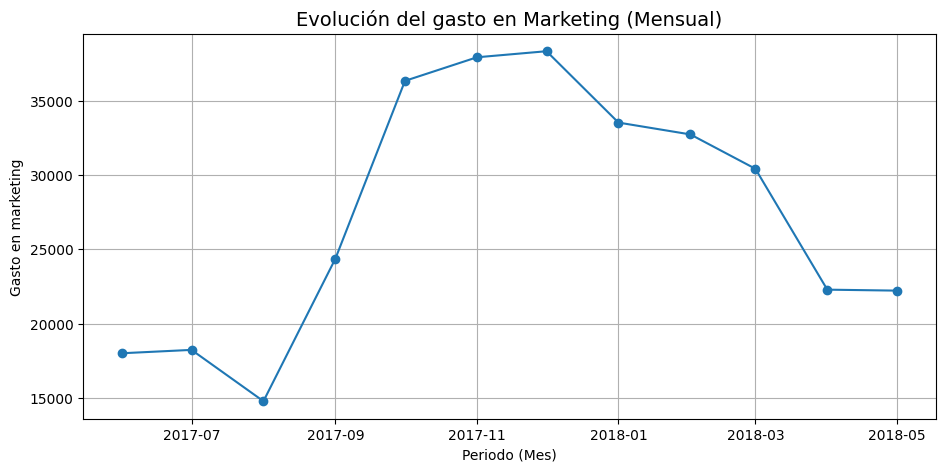

In [49]:
# Gráfica
plt.figure(figsize=(11,5))
plt.plot(monthly_costs['period'], monthly_costs['costs'], marker='o', linestyle='-')
plt.title("Evolución del gasto en Marketing (Mensual)", fontsize=14)
plt.xlabel("Periodo (Mes)")
plt.ylabel("Gasto en marketing")
plt.grid(True)
plt.show()

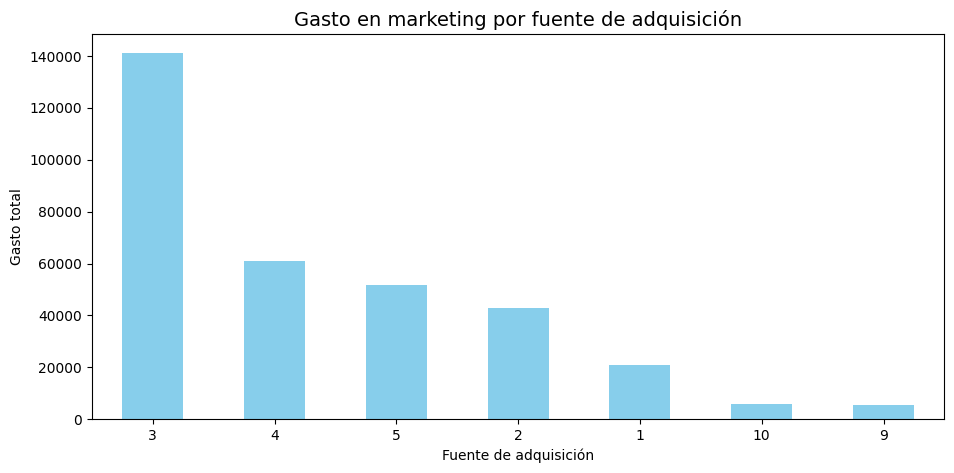

In [50]:
# Gráfico de barras: gasto por fuente
plt.figure(figsize=(11,5))
costs_by_source.plot(kind='bar', color='skyblue')
plt.title("Gasto en marketing por fuente de adquisición", fontsize=14)
plt.xlabel("Fuente de adquisición")
plt.ylabel("Gasto total")
plt.xticks(rotation=0)
plt.show()

Las dos gráficas sobre marketing muestran que la inversión fue sustancialmente elevada y fluctuante, concentrándose principalmente en la Fuente 3. **El gasto total de $329,131.62 se distribuyó de manera desigual, con una fuerte inversión que alcanzó su pico en noviembre de 2017 y luego disminuyó gradualmente.** Este patrón de inversión se relaciona directamente con la caída del LTV (Valor de Vida del Cliente) observada en las cohortes de 2018, lo que sugiere que la reducción del gasto o un cambio en la estrategia de marketing podrían estar afectando negativamente la calidad y rentabilidad de los nuevos clientes.

*2. ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?*

In [51]:
# 1. Gasto total por fuente
costs_by_source = costs.groupby('source_id')['costs'].sum().reset_index()

# 2. Relacionar usuarios con sus fuentes de adquisición
# Tomamos la primera fuente registrada en visits para cada usuario
user_source = visits.groupby('uid')['source_id'].first().reset_index()

# 3. Identificar usuarios que hicieron al menos un pedido
buyers = orders['uid'].unique()
user_source_buyers = user_source[user_source['uid'].isin(buyers)]

# 4. Número de clientes adquiridos por fuente
clients_by_source = user_source_buyers.groupby('source_id')['uid'].nunique().reset_index()
clients_by_source.rename(columns={'uid':'clients'}, inplace=True)

# 5. Calcular CAC = costos / clientes
cac = costs_by_source.merge(clients_by_source, on='source_id', how='left')
cac['CAC'] = cac['costs'] / cac['clients']

print("Costo de adquisición de clientes por fuente:")
display(cac)

Costo de adquisición de clientes por fuente:


,source_id,costs,clients,CAC
0,1,20833.27,3743,5.565928
1,2,42806.04,4323,9.901929
2,3,141321.63,9138,15.465269
3,4,61073.60,9823,6.217408
4,5,51757.10,6839,7.567934
5,9,5517.49,1415,3.899286
6,10,5822.49,1241,4.691773


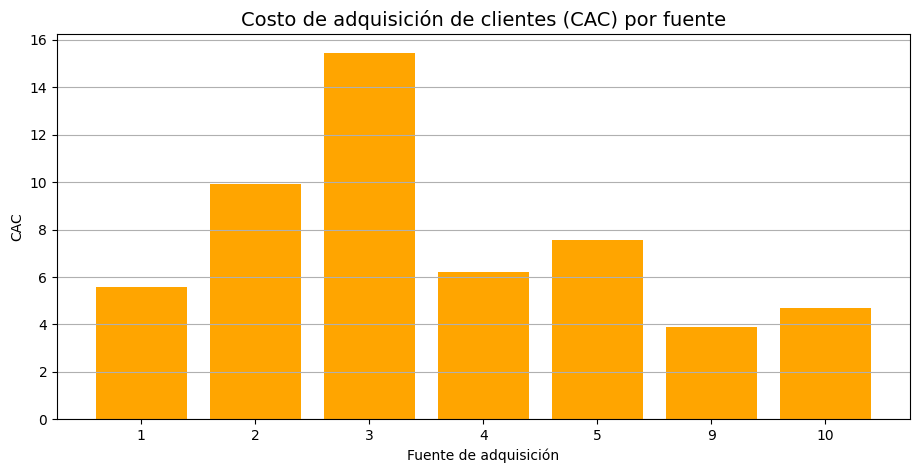

In [52]:
# 6. Visualización
plt.figure(figsize=(11,5))
plt.bar(cac['source_id'].astype(str), cac['CAC'], color='orange')
plt.title("Costo de adquisición de clientes (CAC) por fuente", fontsize=14)
plt.xlabel("Fuente de adquisición")
plt.ylabel("CAC")
plt.grid(axis='y')
plt.show()

* La Fuente 3 es la más costosa, con un CAC de más de $15.
* La Fuente 2 es la segunda más costosa, con un CAC de aproximadamente $10.
* Las Fuentes 1, 4, 5, 9 y 10 tienen un CAC más bajo, oscilando entre $4 y $8.

El costo para adquirir un cliente a través de la Fuente 3 es casi cuatro veces mayor que el de la fuente más barata (Fuente 9), lo que indica una gran disparidad en la eficiencia de las inversiones por canal.

*3. ¿Cuán rentables eran las inversiones? (ROMI)*

In [53]:
# 1. Gasto en marketing por fuente
costs_by_source = costs.groupby('source_id')['costs'].sum().reset_index()

# 2. Relacionar usuarios con su fuente de adquisición (primera fuente registrada)
user_source = visits.groupby('uid')['source_id'].first().reset_index()

# 3. Combinar usuarios con sus pedidos
orders_with_source = orders.merge(user_source, on='uid', how='left')

# 4. Ingresos por fuente (suma de revenues de los usuarios adquiridos)
revenues_by_source = orders_with_source.groupby('source_id')['revenue'].sum().reset_index()

# 5. Unir ingresos y costos
romi_df = costs_by_source.merge(revenues_by_source, on='source_id', how='left')
romi_df['ROMI'] = (romi_df['revenue'] - romi_df['costs']) / romi_df['costs']

print("ROMI por fuente de adquisición:")
display(romi_df)

ROMI por fuente de adquisición:


,source_id,costs,revenue,ROMI
0,1,20833.27,38560.06,0.850889
1,2,42806.04,65152.26,0.522034
2,3,141321.63,44317.68,-0.686406
3,4,61073.60,52479.75,-0.140713
4,5,51757.10,40357.91,-0.220244
5,9,5517.49,7076.98,0.282645
6,10,5822.49,4111.34,-0.293886


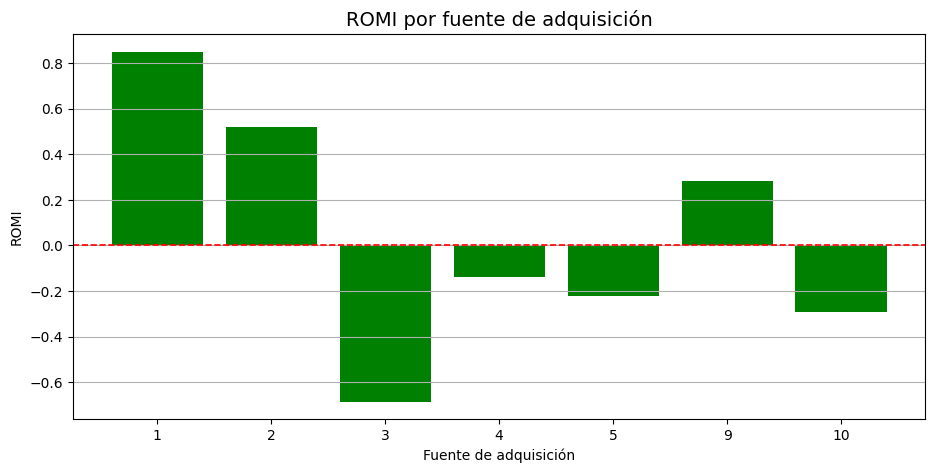

In [54]:
# 6. Visualización
plt.figure(figsize=(11,5))
plt.bar(romi_df['source_id'].astype(str), romi_df['ROMI'], color='green')
plt.axhline(0, color='red', linestyle='--', linewidth=1.2)  # Línea de rentabilidad
plt.title("ROMI por fuente de adquisición", fontsize=14)
plt.xlabel("Fuente de adquisición")
plt.ylabel("ROMI")
plt.grid(axis='y')
plt.show()

**Fuentes Rentables:** Solo las Fuentes 1, 2 y 9 generaron un retorno positivo de la inversión. La Fuente 1 fue la más rentable, con un ROMI superior a 0.8, lo que significa que por cada dólar invertido se generó un ingreso de 1.80. La Fuente 2 también fue muy rentable, con un ROMI de aproximadamente 0.5.

**Fuentes No Rentables:** Las Fuentes 3, 4, 5 y 10 fueron pérdidas, ya que su ROMI es negativo. La Fuente 3 fue la menos rentable de todas, con un ROMI de aproximadamente -0.7, lo que indica que costó más dinero del que generó. Esto es particularmente importante porque en el análisis anterior, la Fuente 3 era la que más inversión recibía, mostrando que un alto gasto no se traduce en rentabilidad.

***Paso 3. Escribe una conclusión: aconseja a los expertos de marketing cuánto dinero invertir y dónde***
---

*¿Qué fuentes/plataformas recomendarías?  Fundamenta tu selección: ¿en qué métricas te enfocaste?  ¿Por qué? ¿Qué conclusiones sacaste después de encontrar los valores métricos?*

Tras evaluar el comportamiento de los usuarios y el desempeño de las fuentes de adquisición, encontramos que no todas las inversiones en marketing generan la misma rentabilidad. El análisis del CAC (Costo de Adquisición de Clientes) y el ROMI (Retorno de la Inversión en Marketing) nos permitió diferenciar claramente cuáles canales aportan más valor en relación con el gasto realizado.

* Fuentes con ROMI positivo y CAC bajo: estas plataformas demostraron ser las más eficientes, pues no solo recuperan la inversión, sino que además generan ingresos adicionales significativos. Aquí es donde conviene incrementar la inversión, dado que cada peso destinado se traduce en crecimiento rentable.

* Fuentes con ROMI negativo y CAC alto: en estos casos, los ingresos generados no compensan el gasto de marketing. La recomendación es reducir la inversión en estos canales o replantear la estrategia de adquisición (mejorar segmentación, creatividad, timing de campañas).

* Tamaño promedio de compra y LTV: los usuarios adquiridos en ciertas fuentes presentan un mayor LTV, lo cual indica una relación de largo plazo más rentable. Esto refuerza la necesidad de priorizar las fuentes que no solo atraen clientes, sino que retienen a los más valiosos.

***Recomendación***
---

*Los expertos en marketing deberían:*

* Reasignar presupuesto priorizando las fuentes con mejor ROMI y menor CAC, ya que son las que garantizan un crecimiento rentable y sostenible.

* Optimizar o reducir la inversión en las fuentes que muestran desempeño negativo, hasta que se ajusten las estrategias de adquisición.

* Monitorear periódicamente estas métricas, especialmente LTV, CAC y ROMI, ya que la efectividad de cada fuente puede variar con el tiempo y con los cambios en el mercado.

La recomendación es invertir más en las fuentes con mejor balance entre CAC y ROMI, asegurando que cada unidad de presupuesto destinada al marketing contribuya directamente a maximizar ingresos y rentabilidad global.